1. Make sure you have placed the 'To_Google_drive.zip' to your google drive (in root directory)
2. Make sure you have enabled the GPU in the 'Edit-->Notebook setting-->Hardware accelerator--> GPU'
3. Make sure you have enabled the High Ram in the 'Edit-->Notebook setting-->Runtime shape--> High-Ram'


# Imports

In [ ]:
import os.path
from os import path
from google.colab import drive
import torch
from IPython.display import Image
import glob
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
import cv2
from tensorflow.keras.models import load_model, save_model

In [ ]:
# Mount the google drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive

Mounted at /content/gdrive


In [ ]:
# Getting the "To_Google_drive.zip" that contains images and models.
!unzip -q /mydrive/To_Google_drive.zip -d ./

In [ ]:
# Cloning a yolov5 model.
!git clone https://github.com/ultralytics/yolov5 -qq
!pip install -U -r yolov5/requirements.txt -qq

%cd /content/yolov5

     |████████████████████████████████| 11.2 MB 4.2 MB/s 
     |████████████████████████████████| 60.5 MB 1.5 MB/s 
     |████████████████████████████████| 4.3 MB 62.9 MB/s 
     |████████████████████████████████| 596 kB 87.5 MB/s 
     |████████████████████████████████| 63 kB 33 kB/s 
     |████████████████████████████████| 38.1 MB 107.9 MB/s 
     |████████████████████████████████| 5.8 MB 25.5 MB/s 
     |████████████████████████████████| 930 kB 69.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
tensorflow 2.8.0 requires tensorboard<2.9,>=2.8, but you have tensorboard 2.9.0 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3

# Train a YOLO object detection model


## Visualize the training data

In [ ]:
"""
Read 9 images to visualize train images
"""

# Read path to first 9 images
path_words = glob.glob("/content/To_Google_drive/words_v2/train/images/*.jpg")[:9]

# Read images
images_words = []
for path_word in path_words:
  images_words.append(cv2.imread(path_word))

# Print shape
images_words = np.array(images_words)
print(images_words.shape)

(9, 608, 608, 3)


In [ ]:
# Install older matplotlib version because new is defect
!pip install matplotlib==3.1.3 -qq

     |████████████████████████████████| 13.1 MB 4.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


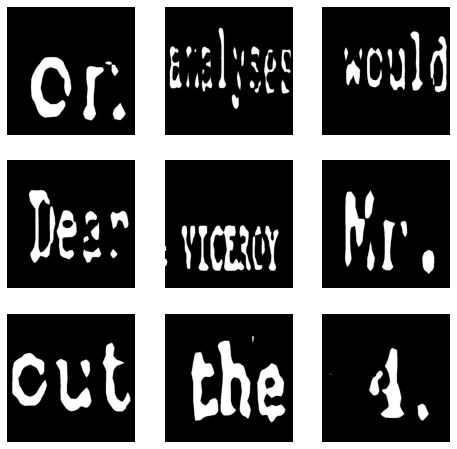

In [ ]:
"""
Visualize images
"""

# Plot 9 images
plt.figure(figsize=(8, 8))
for index in range(9):
    plt.subplot(3, 3, index+1)
    plt.imshow(images_words[index])
    plt.axis('off')

## Train the YOLO model on the training data

Here I trained a model. I trained it for 1000 epochs. The code below is only set to 10 to prove that it works.

In [ ]:
# Install new matplotlib to satisfy yolo model requirements
!pip install matplotlib==3.2.2 -qq

     |████████████████████████████████| 12.4 MB 3.7 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
"""
Train the yolov5 model with the training data.
"""

# Run training. Set to 10 epochs.
!python train.py --img 608 --batch 16 --epochs 10 --data /content/To_Google_drive/words_v2/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/To_Google_drive/words_v2/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=608, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-174-gc4cb7c6 torch 1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hs

# Test the YOLO object detetection model

In [ ]:
"""
Save model if needed by uncommenting the lines below. 
Run the code and drag the output in the 'To_google_drive.zip' zip file at To_google_drive/yolo_trained_weights/. Be sure to remove or rename the old one and rezip the 'To_google_drive'. 
Then restart this colab so it uses the new 'To_Google_drive.zip'.
"""
# # Save output i needed
# outputs = glob.glob("/content/yolov5/runs/train/*")
# weights_path = outputs[len(outputs)-1] + "/weights/best.pt"
# !cp -av $weights_path /mydrive/ # Save to your google drive named best.pt


'\nSave the weights\n'

The code below tests the model with weights I trained. The training above was to prove that it works. 

In [ ]:
"""
Test the model using weights I trained
"""
# Run detect
!python detect.py --save-txt --weights /content/To_Google_drive/yolo_trained_weights/best.pt --img 608 --conf 0.4 --source /content/To_Google_drive/words_v2/test/images

detect: weights=['/content/To_Google_drive/yolo_trained_weights/best.pt'], source=/content/To_Google_drive/words_v2/test/images, data=data/coco128.yaml, imgsz=[608, 608], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-174-gc4cb7c6 torch 1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/10 /content/To_Google_drive/words_v2/test/images/110.jpg: 608x608 2 characters, Done. (0.012s)
image 2/10 /content/To_Google_drive/words_v2/test/images/133.jpg: 608x608 2 characters, Done. (0.012s)
image 3/10 /content/To_Google_drive/words_v2/test/images/313.jpg: 608x608 2 characters, Done. (0.012s)
image 4/10 /conten

/content/yolov5/runs/detect/exp/*jpg


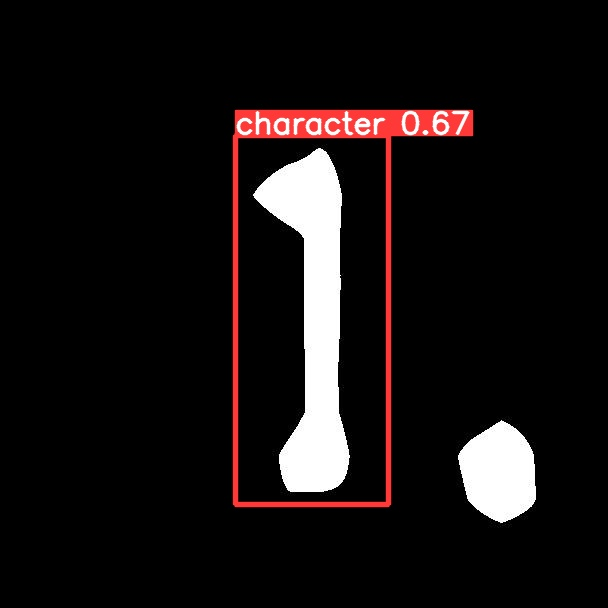

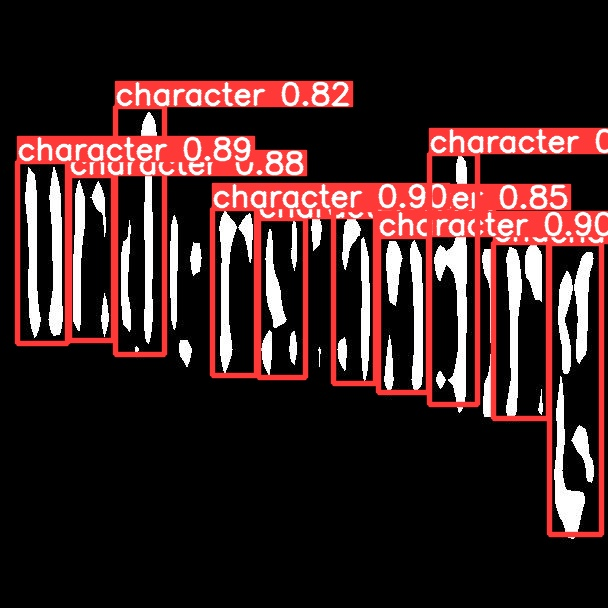

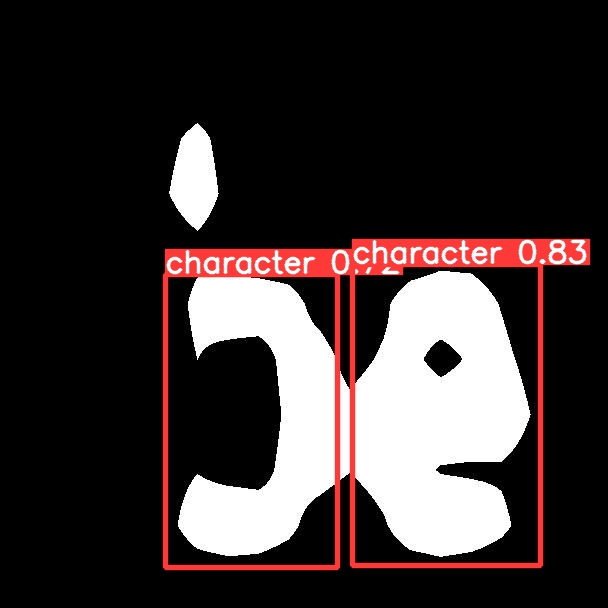

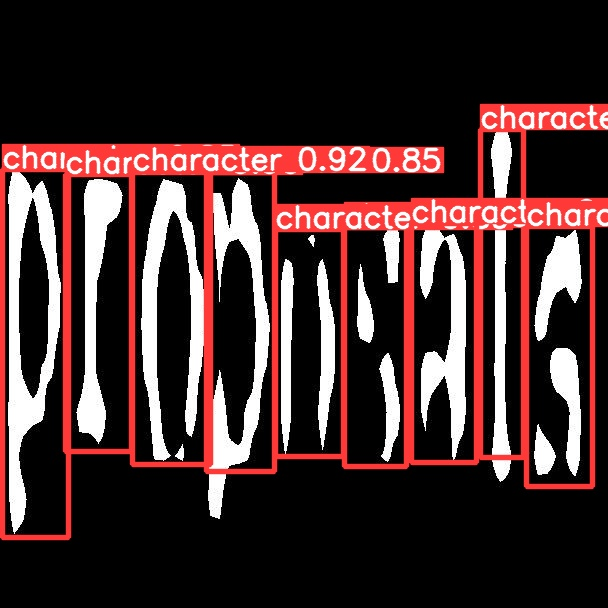

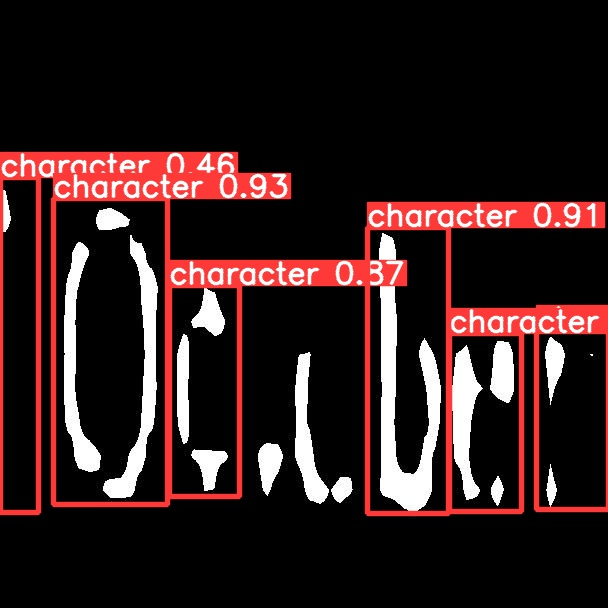

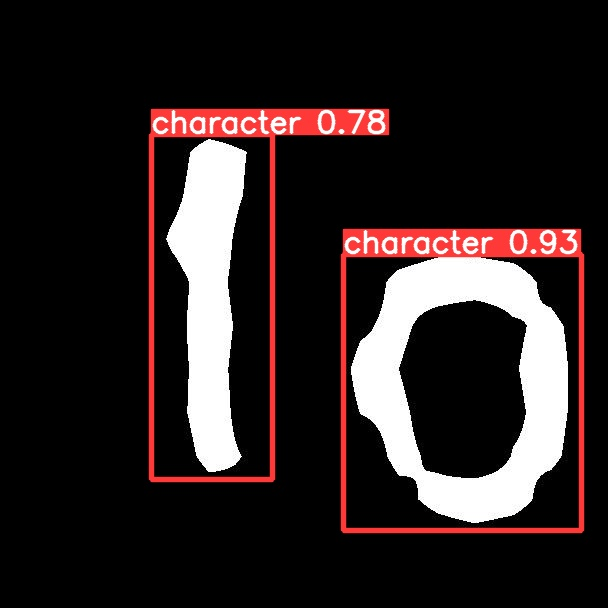

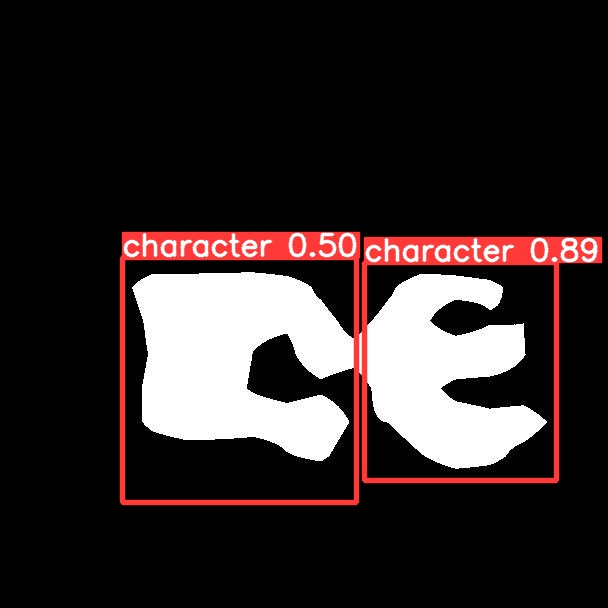

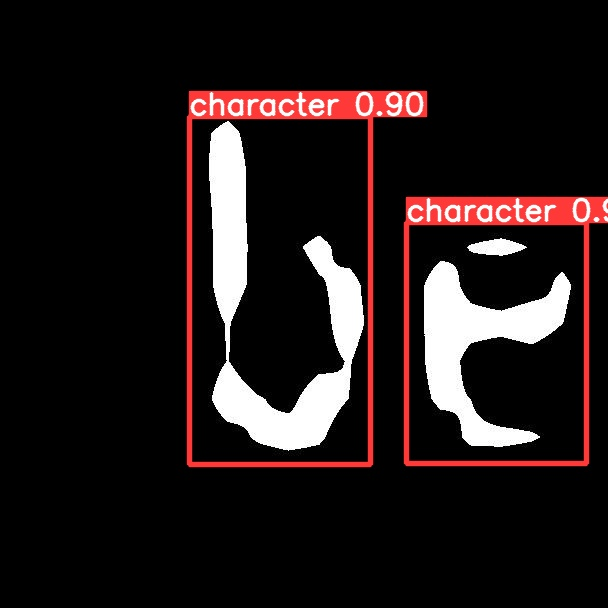

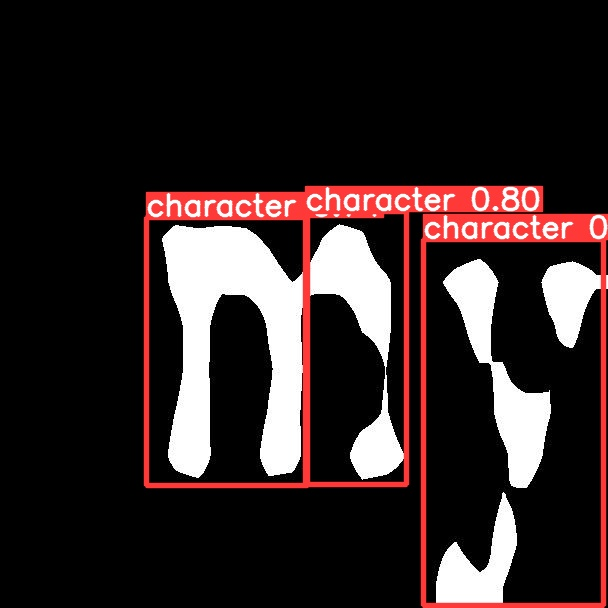

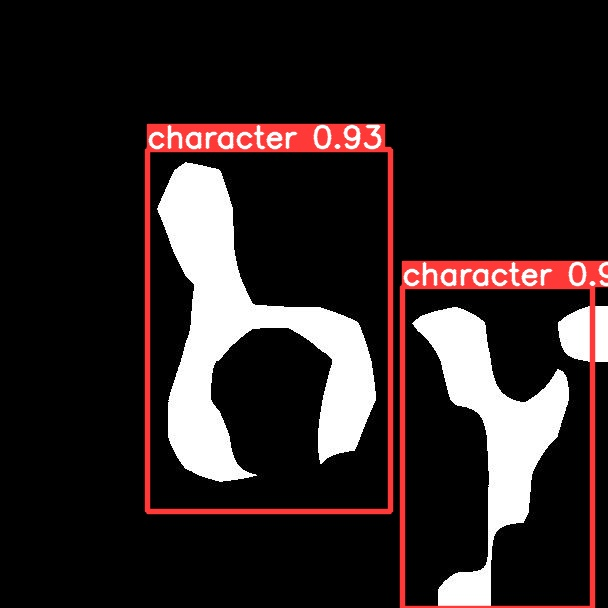

In [ ]:
"""
Visualize the detected characters
"""
# Find the latest detection
outputs = glob.glob("/content/yolov5/runs/detect/*")
last_output = outputs[len(outputs)-1] + "/*jpg"
print(last_output)

# Visualize
for imageName in glob.glob(last_output):
  display(Image(filename=imageName))
  print("\n")

Looks good. Object detection training finished

# Train a CNN model

## Preparing the data for a CNN model

In [ ]:
"""
Read images in correct order. 0, 1, 2..
"""

# Path to images
number_of_images = len(glob.glob("/content/To_Google_drive/augmented/images/*.jpg"))
# Read images
images = []
for i in range(number_of_images):
  # Read image using opencv
  image = cv2.imread("/content/To_Google_drive/augmented/images/"+str(i)+".jpg")
  # To numpy array
  image = np.array(image)
  # Add to list
  images.append(image)
# To numpy array
images = np.array(images)
# Print shape
print(images.shape)

(141422, 128, 128, 3)


In [ ]:
"""
Read labels. They are in order: 0, 1, 2 ..
"""

# Read labels
labels = pd.read_csv('/content/To_Google_drive/augmented/labels.csv')
# Print shape
labels.shape

(141422, 1)

In [ ]:
# Print first lines
labels.head()

,label
0,0
1,0
2,0
3,0
4,0


In [ ]:
"""
Get classes and number of classes
"""
# Get number of classes
number_of_classes = len(labels["label"].sort_values().unique())w
# Get names of classes
labels = np.array(labels["label"])
# Print number of classes
print(number_of_classes)

62


In [ ]:
"""
Split the images and labels into train, val and test. 
"""

# Split in to train and val data
x_train, x_val, y_train, y_val = train_test_split(images,
                                                  labels,
                                                  train_size=0.8,
                                                  test_size=0.2,
                                                  )
# Split training to get test data
x_train, x_test, y_train, y_test = train_test_split(x_train,
                                                  y_train,
                                                  train_size=0.9,
                                                  test_size=0.1,
                                                  )

In [ ]:
# Print shape of images and shape
print('training set: ', x_train.shape, y_train.shape)
print('validation set: ', x_val.shape, y_val.shape)
print('testing set: ', x_test.shape, y_test.shape)

training set:  (101823, 128, 128, 3) (101823,)
validation set:  (28285, 128, 128, 3) (28285,)
testing set:  (11314, 128, 128, 3) (11314,)


In [ ]:
# Install new matplotlib because the YOLO installs other version
!pip install matplotlib==3.1.3 -qq

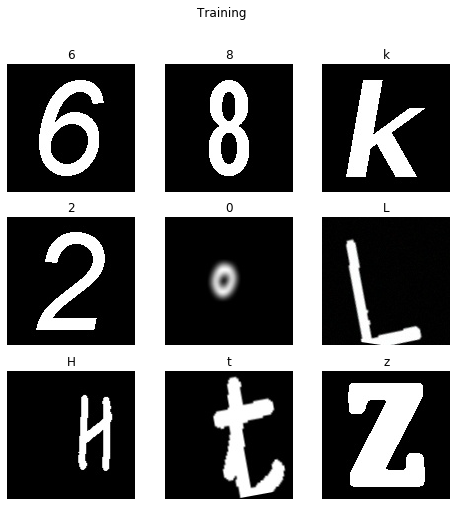

In [ ]:
"""
Visualize 9 images from the train data. Visualize with their respective label id
"""

# Dictionary of what each label id means
label_id = {"0":"0", "1":"1", "2":"2", "3":"3", "4":"4", "5":"5", "6":"6", "7":"7", "8":"8", "9":"9", "10":"A",
            "11":"B", "12":"C", "13":"D", "14":"E", "15":"F", "16":"G", "17":"H", "18":"I", "19":"J", "20":"K",
            "21":"L", "22":"M", "23":"N", "24":"O", "25":"P", "26":"Q", "27":"R", "28":"S", "29":"T", "30":"U",
            "31":"V", "32":"W", "33":"X", "34":"Y", "35":"Z", "36":"a", "37":"b", "38":"c", "39":"d", "40":"e",
            "41":"f", "42":"g", "43":"h", "44":"i", "45":"j", "46":"k", "47":"l", "48":"m", "49":"n", "50":"o",
            "51":"p", "52":"q", "53":"r", "54":"s", "55":"t", "56":"u", "57":"v", "58":"w", "59":"x", "60":"y",
            "61":"z" }

# Select random indexes from the train data
indexes = random.sample(range(0, len(x_train)), 9)

# Pick the samples from the train data
plotting_images = []
plotting_labels = []
for index in indexes:
  image = x_train[index]
  plotting_images.append(image)
  label = y_train[index]
  plotting_labels.append(label_id[str(label)])

# Visualize the samples
plt.figure(figsize=(8, 8))
plt.suptitle('Training')
for index in range(9):
    plt.subplot(3, 3, index+1)
    plt.imshow(plotting_images[index])
    plt.title(plotting_labels[index])
    plt.axis('off')

## Create and train a CNN model

In [ ]:
"""
Create a CNN model
"""

# Building model function
def build_model():

    # Importing a VGG16 model. Freze layers
    feauture_extraction_model = VGG16(weights="imagenet", include_top=False, input_shape=(128,128,3))
    feauture_extraction_model.trainable = False # Removes the classification layer and freeze the model

    # Define model
    model = tf.keras.models.Sequential([
        feauture_extraction_model, # VGG model that is freezed
        Flatten(),
        Dense(80, activation='relu'), # Dense layers
        Dense(50, activation='relu'),
        Dense(number_of_classes, activation='softmax'), # Output
    ])
    
    # Compiling
    adam = Adam(learning_rate=0.0001)
    model.compile(optimizer=adam, loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [ ]:
"""
Build model
"""
# Build model
model = build_model()
# Print summary
model.summary()

58900480/58889256 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 80)                655440    
                                                                 
 dense_1 (Dense)             (None, 50)                4050      
                                                                 
 dense_2 (Dense)             (None, 62)                3162      
                                                                 
Total params: 15,377,340
Trainable params: 662,652
Non-trainable params: 14,714,688
_______________________________________

The model that is fitted below is only set to 2 epochs to prove that it works. When I trained I set it to 50 epochs.

In [ ]:
"""
Fit train and val data to train the model
"""

# Specify early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Specify adaptive learning rate
adaptive_learning_rate = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              mode="min", patience=3, min_lr=0.000001)
                            
# Fit and train the model
history = model.fit(x_train, y_train, epochs=2,
                    validation_data=(x_val, y_val),
                    batch_size=16, verbose=1,
                    callbacks=[early_stopping, adaptive_learning_rate]
                    )

Epoch 1/2
6364/6364 [==============================] - ETA: 0s - loss: 1.6715 - accuracy: 0.5771

The model below is tested with the model/weights I trained. The training above was to prove that it works.

In [ ]:
"""
Save model if needed by uncommenting the lines below.
Run the code and drag the output in the 'To_google_drive.zip' zip file at To_google_drive/cnn_trained_model/. Be sure to remove or rename the old one and rezip the 'To_google_drive'. 
Then restart this colab so it uses the new 'To_Google_drive.zip'.
"""

# # Save model
# model.save_mode("/content/gdrive/MyDrive/CNN_trained_model.h5")



In [ ]:
"""
Loading the CNN model with the weights I trained
"""

model = load_model("/content/To_Google_drive/cnn_trained_model/CNN_trained_model.h5")

In [ ]:
"""
Evaluating the model to get 
"""
results = model.evaluate(x_test, y_test)
print("test loss, test acc:", results)

354/354 [==============================] - 29s 49ms/step - loss: 0.1846 - accuracy: 0.9570
test loss, test acc: [0.1845928430557251, 0.9569559693336487]


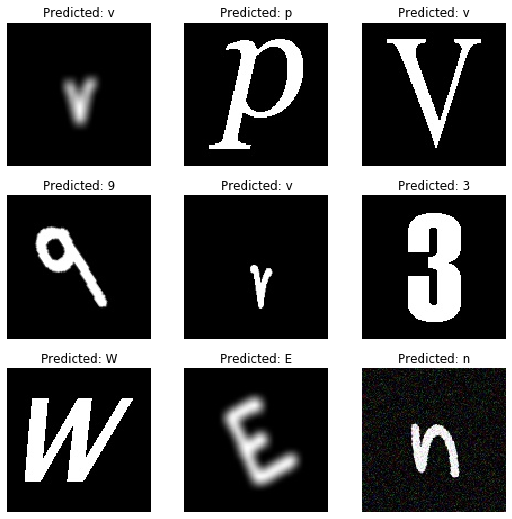

In [ ]:
"""
Visualizing some predictions
"""
first_images = x_test[:9]
predictions = model.predict(first_images)

first_predictions = []
for prediction in predictions:
  first_predictions.append(label_id[str(np.argmax(prediction))])

plt.figure(figsize=(9, 9))
for index in range(9):
    plt.subplot(3, 3, index+1)
    plt.imshow(first_images[index])
    plt.title("Predicted: "+ first_predictions[index])
    plt.axis('off')

Looks good. CNN model training finished